# Craft a Story from a Dataset Exercise

1. Select a dataset - any dataset! Make sure it's not too dirty, as this case study is
about storytelling, not cleaning... :)
    - Dataset: Music & Mental Health Survey Results
    - Link to datset: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results?resource=download
2. Pick your audience: executive, technical, or non-technical; and adjust your tone
accordingly.
    - __
4. Take a look at the data: explore it.
5. Think of a narrative, and pursue it.
6. Give a 15 mins presentation to your mentor during your next call.

In your quest, you might need to ask a bunch of other questions, such as:
- Can I count something interesting?
- Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
- Can I make a bar plot or a histogram?
- Can I compare two related quantities?
- Can I make a scatterplot?
- Can I make a time-series plot?
- Looking at the plots, what are some insights I can make?
- Can I see any correlations?
- Is there a hypothesis I can - and should - investigate further?
- What other questions are the insights leading me to ask?

Submission: Submit links to a GitHub repository containing a Jupyter Notebook or a
PowerPoint. The file should contain:
- The questions you asked
- The trends you investigated
- The resulting visualizations and conclusions

## About the dataset:
(From the kaggle source)
        https://www.kaggle.com/datasets/akemail/blue-bike-boston-ma-bike-sharing-dataset?resource=download

The data generated by bike-sharing systems is uniquely rich and dynamic compared to traditional public transportation services like buses or subways. Each transaction records not only the duration but also precise departure and arrival locations, transforming each bicycle into a mobile sensor within an extensive urban network. This capability allows for the monitoring and analysis of urban mobility patterns and offers a unique lens through which to observe city dynamics.

The dataset presented here encapsulates hourly activity metrics for Blue Bikes in Boston, MA, from January 2022 through May 2024. It includes detailed accounts of usage by casual and registered members, trip durations, total activity counts, and travel times, coupled with comprehensive meteorological data recording temperature, relative humidity, wind speed, and atmospheric pressure. Enhanced with temporal data regarding days of the week, weekends, and public holidays, along with general weather conditions, this dataset serves as an invaluable tool for conducting detailed temporal and multivariate studies focused on urban transportation trends and the influence of weather on cycling activity.

## Column Descriptions

- Time Index (Hourly)
    - Date and time when form was submitted
- casual_riders_count
    - Non-Registered Riders count
- member_riders_count
    - Registered Riders count
- casual_rider_duration
    - Non-Registered Riders travel-time (in sec)
- member_rider_duration
    - Registered Riders travel-time (in sec)
- count
    - Total Riders Count
- travel_time
    - Total Travel Time of riders
- day_of_week
    - Week day
- IsWeekend
    - If weekend(Sunday, Saturday) = 1 else 0
- IsHoliday
    - If declared Holiday then 1 else 0
- Temp(c)
    - Temperature in Celcius
- rel_humidity
    - Relative humidity
- wspd
    - Wind speed (km/h)
-  pres
    - Air pressure(mPa)
- weather_condition
    - Categorical (clear, fair, cloudy, rain, snow, Thunderstorm)

# Imports

In [1]:
%matplotlib inline

#data manipulation and math

import numpy as np
import scipy as sp
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

#plotting and visualization

import matplotlib.pyplot as plt
import seaborn as sns

#Data Wrangling
from sklearn.impute import SimpleImputer

from ydata_profiling import ProfileReport

# Import the dataset

In [2]:
df_bikes = pd.read_csv('bluebike_data.csv')
df_bikes.head()

,Unnamed: 0,casual_riders_count,member_riders_count,casual_rider_duration,member_rider_duration,count,travel_time,day_of_week,IsWeekend,IsHoliday,Temp(c),rel_humidity,wspd,pres,weather_condition
0,2022-01-01 00:00:00,28.0,97.0,554672.0,96509.0,125.0,651181.0,SATURDAY,1,1,6.7,89.0,7.6,1014.9,Cloudy
1,2022-01-01 01:00:00,31.0,61.0,46276.0,58472.0,92.0,104748.0,SATURDAY,1,1,6.7,89.0,7.6,1014.7,Cloudy
2,2022-01-01 02:00:00,32.0,41.0,377839.0,45191.0,73.0,423030.0,SATURDAY,1,1,6.7,89.0,7.6,1014.7,Cloudy
3,2022-01-01 03:00:00,54.0,41.0,2537734.0,37167.0,95.0,2574901.0,SATURDAY,1,1,6.7,96.0,5.4,1014.2,Cloudy
4,2022-01-01 04:00:00,49.0,42.0,911448.0,43178.0,91.0,954626.0,SATURDAY,1,1,7.2,93.0,5.4,1014.4,Cloudy


## Rename columns for clarity

In [10]:
df_bikes.rename(columns={'Unnamed: 0' : 'time_index_hourly', 'count' : 'total_count', 'wspd' : 'windspeed', 'pres' : 'pressure', 'travel_time' : 'total_duration'}, inplace=True)
df_bikes.columns

Index(['time_index_hourly', 'casual_riders_count', 'member_riders_count',
       'casual_rider_duration', 'member_rider_duration', 'total_count',
       'total_duration', 'day_of_week', 'isweekend', 'isholiday', 'temp(c)',
       'rel_humidity', 'windspeed', 'pressure', 'weather_condition'],
      dtype='object')

## Make col names lower case

In [11]:
df_bikes.columns = [x.lower() for x in df_bikes.columns]
df_bikes.columns

Index(['time_index_hourly', 'casual_riders_count', 'member_riders_count',
       'casual_rider_duration', 'member_rider_duration', 'total_count',
       'total_duration', 'day_of_week', 'isweekend', 'isholiday', 'temp(c)',
       'rel_humidity', 'windspeed', 'pressure', 'weather_condition'],
      dtype='object')

## Explore the dataframe

In [12]:
print(df_bikes.info())
print('\n')
print(f'shape:\n{df_bikes.shape[1]} columns\n{df_bikes.shape[0]} rows')
print('\n')
print('Count of unique values per column:')
print(df_bikes.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21079 entries, 0 to 21078
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   time_index_hourly      21079 non-null  object 
 1   casual_riders_count    21079 non-null  float64
 2   member_riders_count    21079 non-null  float64
 3   casual_rider_duration  21079 non-null  float64
 4   member_rider_duration  21079 non-null  float64
 5   total_count            21079 non-null  float64
 6   total_duration         21079 non-null  float64
 7   day_of_week            21079 non-null  object 
 8   isweekend              21079 non-null  int64  
 9   isholiday              21079 non-null  int64  
 10  temp(c)                21079 non-null  float64
 11  rel_humidity           21079 non-null  float64
 12  windspeed              21079 non-null  float64
 13  pressure               21079 non-null  float64
 14  weather_condition      21079 non-null  object 
dtypes:

# Wrangling

## Outlier detection
- Box plots

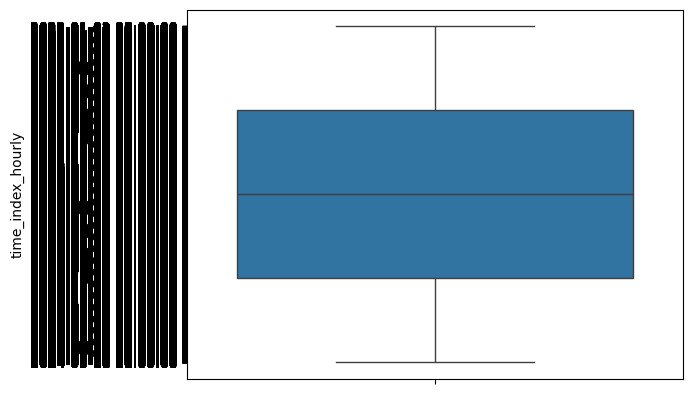

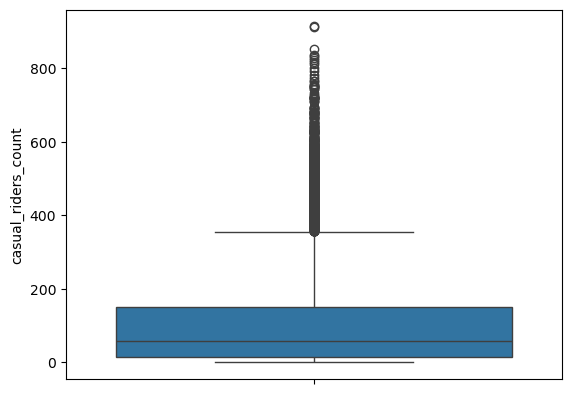

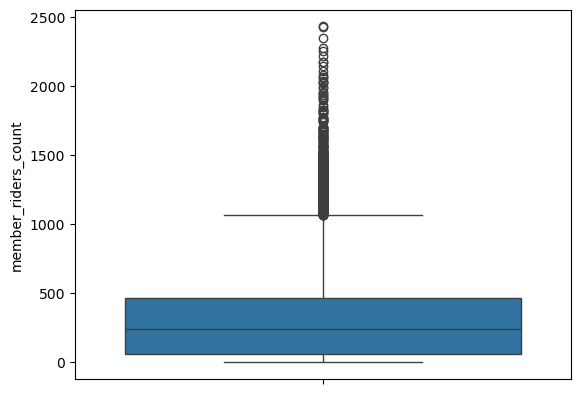

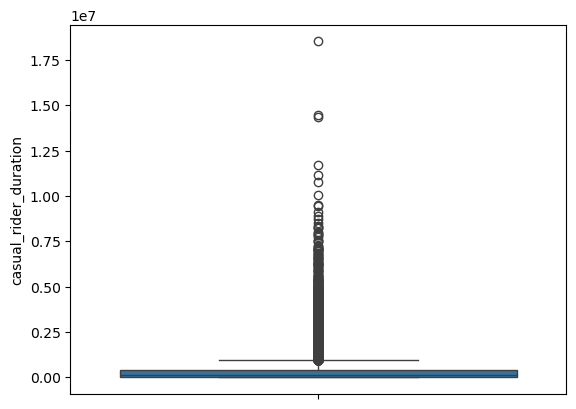

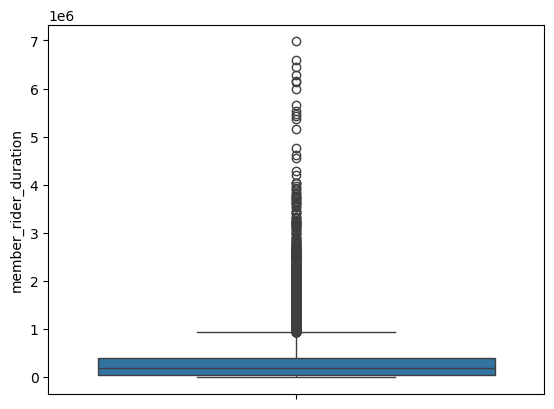

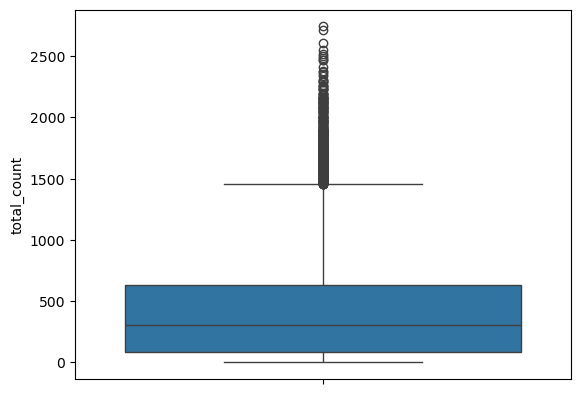

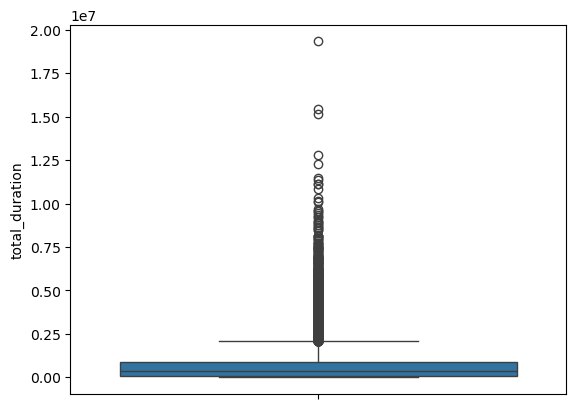

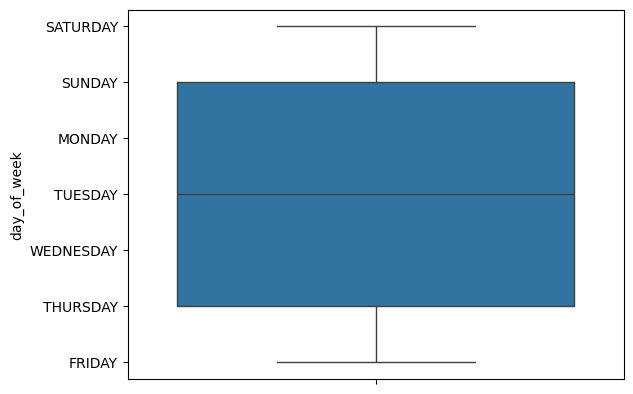

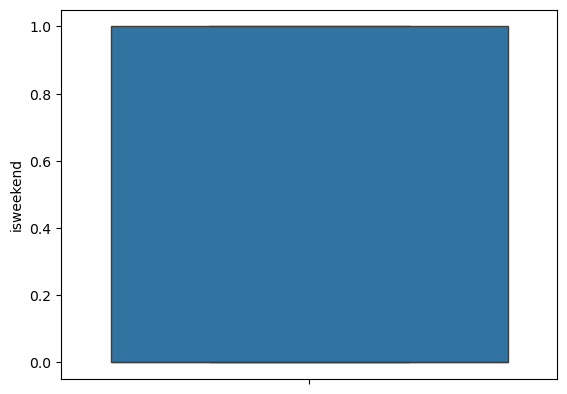

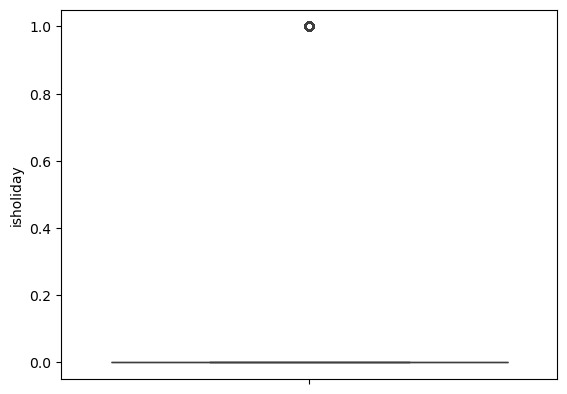

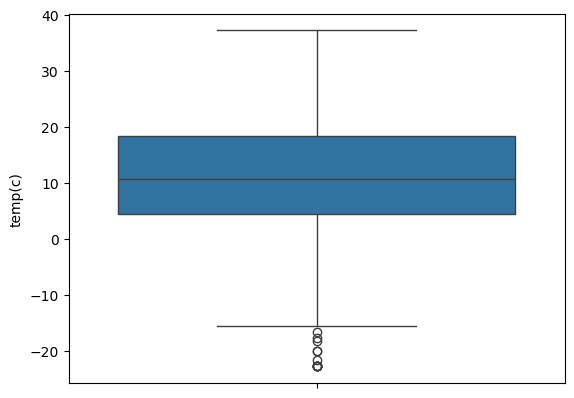

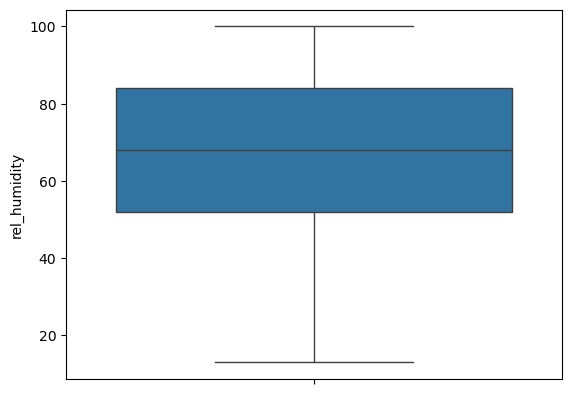

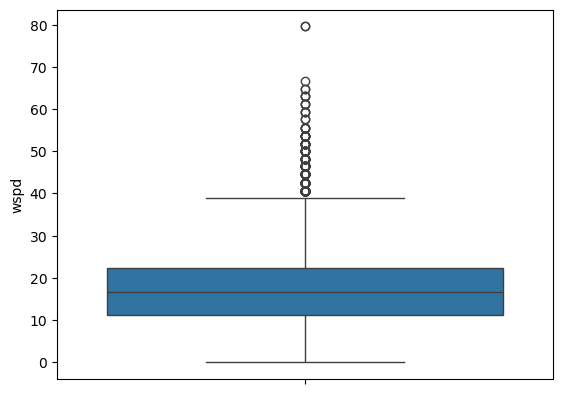

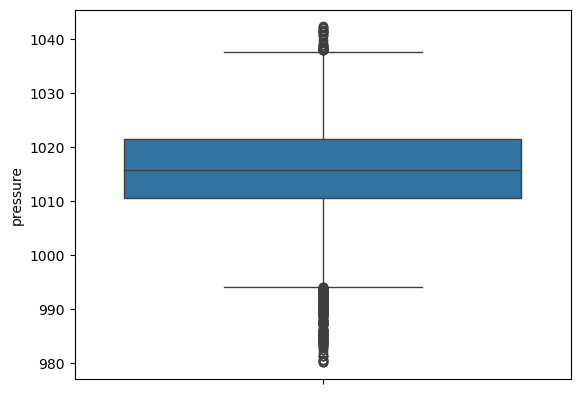

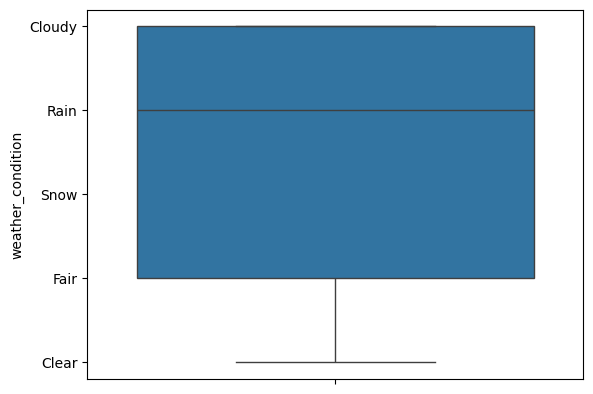

In [6]:
for col in df_bikes.columns:
    #sns.boxenplot(df_bikes[col])
    sns.boxplot(y=df_bikes[col])
    plt.show()
    plt.close()

- Outliers
    - Cols to look into

        - casual_riders_count
        - member_riders_count
        - casual_rider_duration
        - member_rider_duration
        - total_count
        - total_duration
        - isholiday
        - temp(c)
        - windspeed

In [17]:
sns.scatterplot(data=df_bikes, x='time_index_hourly', y='casual_riders_count')
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000015DA1D4E480> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000015DA1D68180> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

# AP: Bookmark

In [ ]:
# Replacing the other outlier in bpm
df_bikes.loc[644, 'bpm'] = df_bikes[df_bikes["fav_genre"]=='EDM'].drop(index=644).bpm.mean()
print(df_bikes.loc[644])

In [ ]:
sns.boxplot(df_bikes)

No more horrible outliers

## Null values

In [ ]:
#total nulls

df_bikes.isnull().sum().sum()

Only 129 total nulls (could have multiple nulls in same row), worth it to just drop them?

In [ ]:
#total number of rows with any null
len(df_bikes) - len(df_bikes.dropna())

In [ ]:
#Total rows check (what % are the nulls of the whole dataset)

print('# of rows:', len(df_bikes.index))
print('# of null rows:', len(df_bikes) - len(df_bikes.dropna()))
print('% of null rows:', round(((len(df_bikes) - len(df_bikes.dropna())) / len(df_bikes.index))*100, 2), '%')

In [ ]:
#nulls per column
df_bikes.isnull().sum().sort_values(ascending=False)

### Null plan:
Drop all rows with null except for 'bpm' column.
'bpm' column nulls will get imputed with the mean of bpm for the 'fav_genre' listed in the row

#### Impute for BPM column

In [ ]:
#looking at mean & other descriptive stats of bpm per fav_genre
df_bikes.groupby(by='fav_genre', dropna=False)['bpm'].describe().T

____
#Code-Cell -converted to markdown cell since this code not needed anymore, keeping for looking back at examples of what I tried

#AP: Made two lists of the fav_genre values and the mean bpm for each genre

fav_genre_list = list(df_bikes['fav_genre'].unique())
print(fav_genre_list)

means_genres = []
for g in fav_genre_list:
    means_genres.append(df_bikes[df_bikes['fav_genre'] == g].bpm.mean())
print(means_genres)

#AP: Made a dict of the two genre & mean bpms lFileExistsError

genre_bpm = dict(zip(fav_genre_list, means_genres))
print(genre_bpm)

____
#Code-Cell -converted to markdown cell since this code not needed anymore, keeping for looking back at examples of what I tried

#AP: fillna per fav_genre in bpm column

for g, b in genre_bpm.items():
        #mean_bpm = df_bikes[df_bikes['fav_genre'] == g].bpm.mean()
        #df_bikes[df_bikes['fav_genre'] == g].bpm.fillna(value = b, inplace=True)
        df_bikes[df_bikes['fav_genre'] == g].bpm.replace(to_replace = 'NaN', value = b, inplace=True)

df_bikes.isnull().sum().sort_values(ascending=False)
____

In [ ]:
#Calculate mean BPM for each genre

genre_means = df_bikes.groupby('fav_genre')['bpm'].mean()
genre_means

In [ ]:
#Define a function to impute null values based on the mean of each genre

def impute_bpm(row):
    if pd.isnull(row['bpm']):
        return genre_means[row['fav_genre']]
    else:
        return row['bpm']

In [ ]:
#Apply the function to the DataFrame

df_bikes['bpm'] = df_bikes.apply(impute_bpm, axis=1)
df_bikes

In [ ]:
print('# of rows:', len(df_bikes.index))
print('# of null rows:', len(df_bikes) - len(df_bikes.dropna()))
print('% of null rows:', round(((len(df_bikes) - len(df_bikes.dropna())) / len(df_bikes.index))*100, 2), '%')

df_bikes.isnull().sum().sort_values(ascending=False)

#### Drop all rows with any amount of nulls
    Should be only 18 rows after imputing BPM col
    Since this is simply a data storytelling exercise, strict data wrangling and investigation of the nulls is not required since rows with nulls are <3% of total rows

In [ ]:
#AP: drop all rows with nulls, and reset index

print('df before shape:', df_bikes.shape)

df_bikes.dropna(axis=0, how='any', inplace=True, ignore_index=True)

print('df after shape:', df_bikes.shape)

## Drop unnecessary cols
    timestamp & permissions

In [ ]:
df_bikes.drop(['timestamp', 'permissions'], axis=1, inplace=True)
df_bikes.columns

## Fix inconsistencies
    i.e. Mental health rankins have some decimals (5.5) instead of all integers
    hours_per_day round to whole numbers
        round 1.5h to 2h & 2.5h to 3h

In [ ]:
df_bikes[['anxiety', 'depression', 'insomnia', 'ocd', 'music_effects']] = df_bikes[['anxiety', 'depression', 'insomnia', 'ocd', 'music_effects']].round(0)

In [ ]:
df_bikes['hours_per_day'].replace(1.5, 2, inplace=True)
df_bikes['hours_per_day'].replace(2.5, 3, inplace=True)
df_bikes['hours_per_day'].replace(4.5, 5, inplace=True)
df_bikes['hours_per_day'].value_counts(dropna=False).sort_index(ascending=True)

## Convert numerical cols to categorical
    Majority of features are categorical, and the numerical cols aren't truly continuous
    ex. convert ages to age ranges (age of 21 would be converted to 20-25 (or similar))

In [ ]:
list(df_bikes.columns)

In [ ]:
df_bikes.nunique()
#Easy visuall for determinging categorical cols
#showed me that there were inconsistencies in the mental health cols (fixed above)

In [ ]:
#Help me to determing best grouping for the numerical cols during categorical conversion & also be able to do a double check on the cat cols

for col in df_bikes.columns:
    print(f'{col} value_counts:\n\n{df_bikes[col].value_counts(dropna=False).sort_index(ascending=False)}\n')

Groupings:

age: custom groups to reflect granularity within certain age groups
    
    - the ages below 33yrs is greater than the combined 33+ yrs

hours_per_day: convert to int dtype (gets rid of the decimals that can affect categorical graphing)

bpm (supposed to be avg bpm per each fav_genre)
- I want to look at the descriptive stats for each genre to decide if imputing mean, meadian, mode, a range or other makes the most sense

In [ ]:
#list of the numerical cols (based on number of unique values)
cols_num = [c for c in df_bikes.columns if df_bikes[c].nunique() > 16]
cols_num

### age col

In [ ]:
age_group_labels = ['0-13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33-35', '36-40', '41-45', '46-55', '56-65', '66-89']

age_group_bins = [0,13,14,15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,40,45,55,65,90]

df_bikes['age_group'] = pd.cut(x=df_bikes['age'], bins=age_group_bins, labels=age_group_labels)
df_bikes[['age_group']].value_counts(dropna=False).sort_index()

### hours_per_day col

In [ ]:
df_bikes['hours_per_day'] = df_bikes['hours_per_day'].astype('int')
df_bikes['hours_per_day'].value_counts().sort_index()

### bpm col

In [ ]:
df_bikes.groupby('fav_genre')['bpm'].describe()

#### With the ranges of bpm per genre, I would like to know how the bpm of the fav_genre was determined during data collection. Is it as reported by the survey responder or calculated by the survey creator?

Moving forward with replacing 

In [ ]:
genre_means

In [ ]:
genre_means_only = round(genre_means, 0)
genre_means_only = [int(i) for i in genre_means]
print(genre_means_only)

genre_list = list(df_bikes['fav_genre'].unique())
print(genre_list)

In [ ]:
for g in genre_list:
    for i in genre_means_only:
        df_bikes[df_bikes['fav_genre'] == g]['bpm'] = i

In [ ]:
df_bikes.groupby('fav_genre')['bpm'].describe()

In [ ]:
def mean_bpm_genre(row, genre):
    if row['fav_genre']==genre):
        return genre_means[row['fav_genre']]
    else:
        return row['bpm']

AP: Now the dataframe is ready for analysis & storytelling

# Next Section

# Notes

In [9]:
list(df_bikes.columns)

['time_index_hourly',
 'casual_riders_count',
 'member_riders_count',
 'casual_rider_duration',
 'member_rider_duration',
 'total_count',
 'total_duration',
 'day_of_week',
 'isweekend',
 'isholiday',
 'temp(c)',
 'rel_humidity',
 'wspd',
 'pressure',
 'weather_condition']

- Outliers
    - Cols to look into

        - casual_riders_count
        - member_riders_count
        - casual_rider_duration
        - member_rider_duration
        - total_count
        - total_duration
        - isholiday
        - temp(c)
        - windspeed
        - 